In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
# Function to load dataset and automatically choose classes based on folder names
def load_dataset_and_classes(data_folder):
    class_folders = os.listdir(data_folder)
    classes = [folder for folder in class_folders if os.path.isdir(os.path.join(data_folder, folder))]
    class_indices = {cls: i for i, cls in enumerate(classes)}
    
    X_data = []
    y_data = []
    
    for cls in classes:
        cls_folder = os.path.join(data_folder, cls)
        files = os.listdir(cls_folder)
        for file in files:
            image_path = os.path.join(cls_folder, file)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (32, 32))
                X_data.append(image)
                y_data.append(class_indices[cls])
    return np.array(X_data), np.array(y_data), classes


In [4]:
# Load dataset
data_folder = r"D:\jackintern\Datasets"
X_data, y_data, classes = load_dataset_and_classes(data_folder)


In [5]:
# Split and normalize data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# Model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])

c:\Users\pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5314 - loss: 1.0745 - val_accuracy: 0.6060 - val_loss: 0.8901
Epoch 2/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7215 - loss: 0.6229 - val_accuracy: 0.8269 - val_loss: 0.4887
Epoch 3/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8121 - loss: 0.4287 - val_accuracy: 0.8503 - val_loss: 0.3865
Epoch 4/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8728 - loss: 0.3088 - val_accuracy: 0.8837 - val_loss: 0.2856
Epoch 5/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9179 - loss: 0.2161 - val_accuracy: 0.9152 - val_loss: 0.1953
Epoch 6/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9503 - loss: 0.1343 - val_accuracy: 0.9342 - val_loss: 0.1593
Epoch 7/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9509 - loss: 0.1305 - val_accuracy: 0.9297 - val_loss: 0.1791
Epoch 8/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9784 - loss: 0.0632 - val_accuracy: 0.

In [8]:
# Evaluate the model
tloss, taccuracy = model.evaluate(X_train, y_train)
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("TRAINING")
##print("Train Loss:", tloss)
print("Train Accuracy:", taccuracy)

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.7483e-05
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9801 - loss: 0.0739
Test Loss: 0.05915536358952522
Test Accuracy: 0.9810640215873718
TRAINING
Train Accuracy: 1.0


In [9]:
# Save the model
model.save('trainedmodel.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


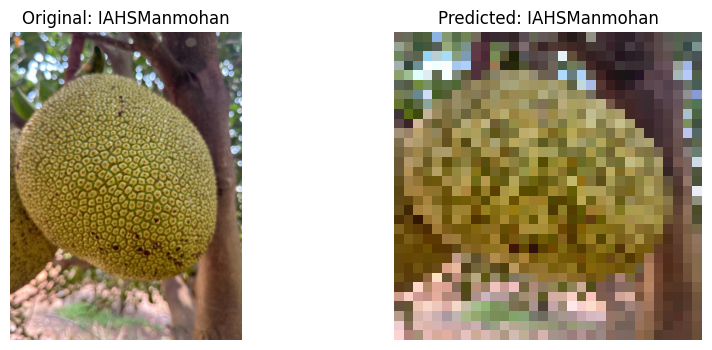

In [10]:
# Function to predict and display image
def predict_and_display_image(image_path, model, classes):
    original_image = cv2.imread(image_path)
    processed_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    processed_image = cv2.resize(processed_image, (32, 32)) / 255.0
    
    prediction = model.predict(np.expand_dims(processed_image, axis=0))
    predicted_class_index = np.argmax(prediction)
    predicted_class = classes[predicted_class_index]
    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    #plt.title("Original Image")
    #plt.imshow(processed_image)
    plt.title(f"Original: {predicted_class}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(processed_image)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

# Example usage
predict_and_display_image(r"D:\jackintern\manmohan.jpg", model, classes)

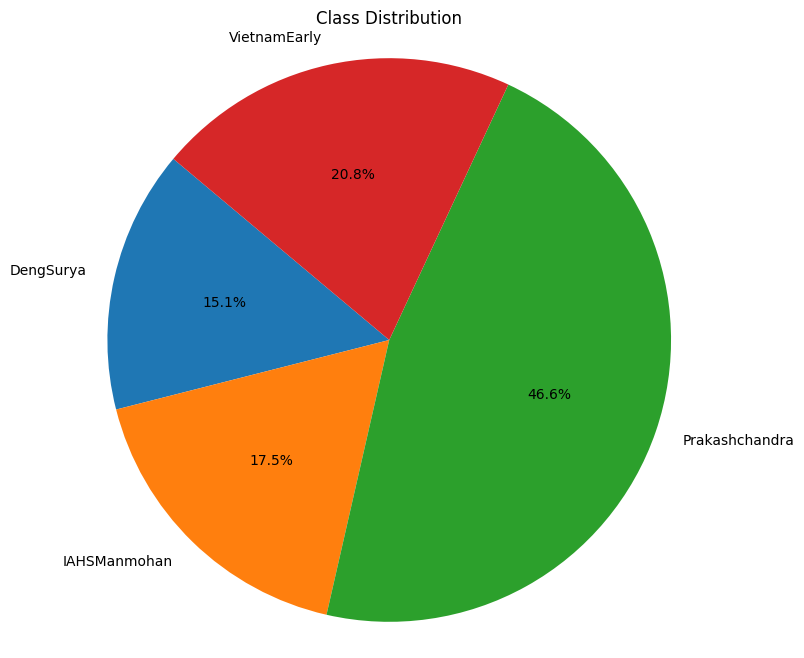

In [11]:
def plot_class_distribution(y_data, classes):
    class_counts = {cls: np.sum(y_data == i) for i, cls in enumerate(classes)}

    plt.figure(figsize=(8, 8))
    plt.pie(class_counts.values(), labels=classes, autopct='%1.1f%%', startangle=140)
    plt.title('Class Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Example usage
specific_classes = ['DengSurya', 'IAHSManmohan', 'Prakashchandra', 'VietnamEarly']
plot_class_distribution(y_data, specific_classes)


In [13]:
# Make predictions
y_pred = model.predict(X_test)
predicted_classes = np.argmax(y_pred, axis=1)

# Print classification report
print("Classification Report:\n", classification_report(y_test, predicted_classes))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


NameError: name 'classification_report' is not defined